<a href="https://colab.research.google.com/github/jdberkson/OPTI-556-Computational-Imaging/blob/main/Homework3_JoelB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 OPTI 556 Computational Imaging

###Part 1

For this part 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist

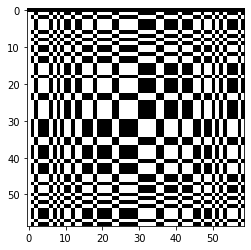

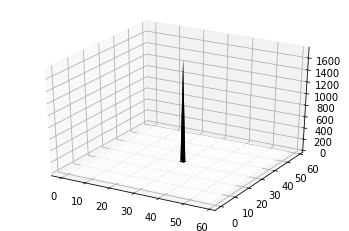

In [2]:
def qres(p):
  #function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  #
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr
p=59
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');
#plt.subplot(1,2,1);
plt.imshow(t,cmap='gray');

fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))


surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')


I started witht he same hand written digits data set just to make sure things were working:

784


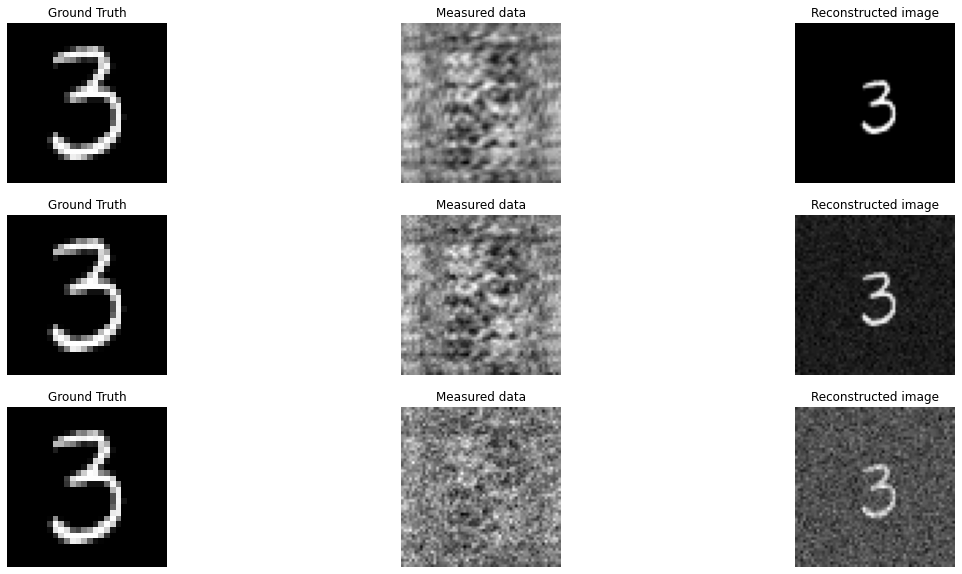

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[50];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[50];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=1000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')


I figured a good test for this would be a step function.

(-0.5, 58.5, 58.5, -0.5)

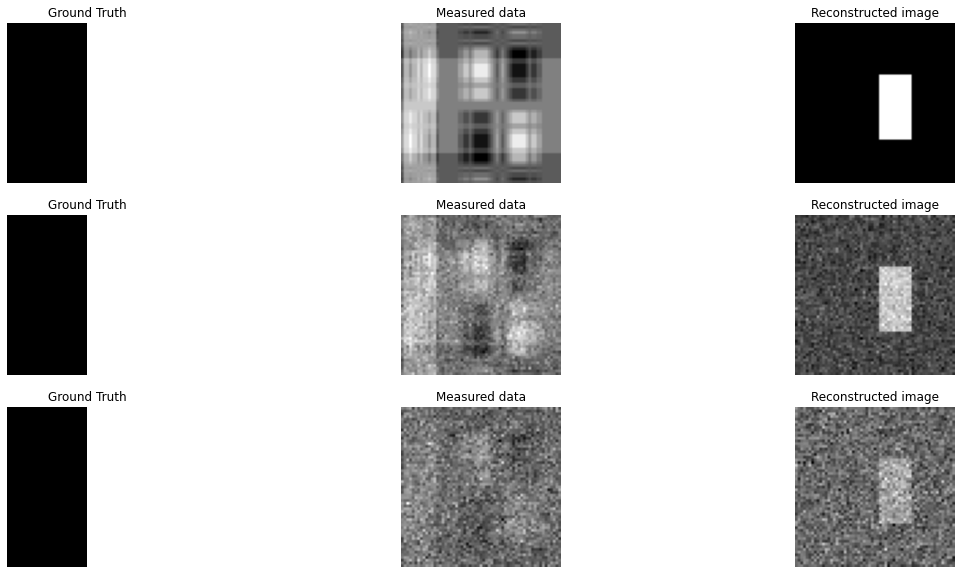

In [39]:
X = np.linspace(0,1,24)
Y = X
X, Y = np.meshgrid(X,Y)
def step(X):

  if(X<.5):
    Z = 0
  else:
    Z = 1
  return Z
stp = np.vectorize(step)
stepfun = stp(X)
imagey = stepfun
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=1000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

(-0.5, 58.5, 58.5, -0.5)

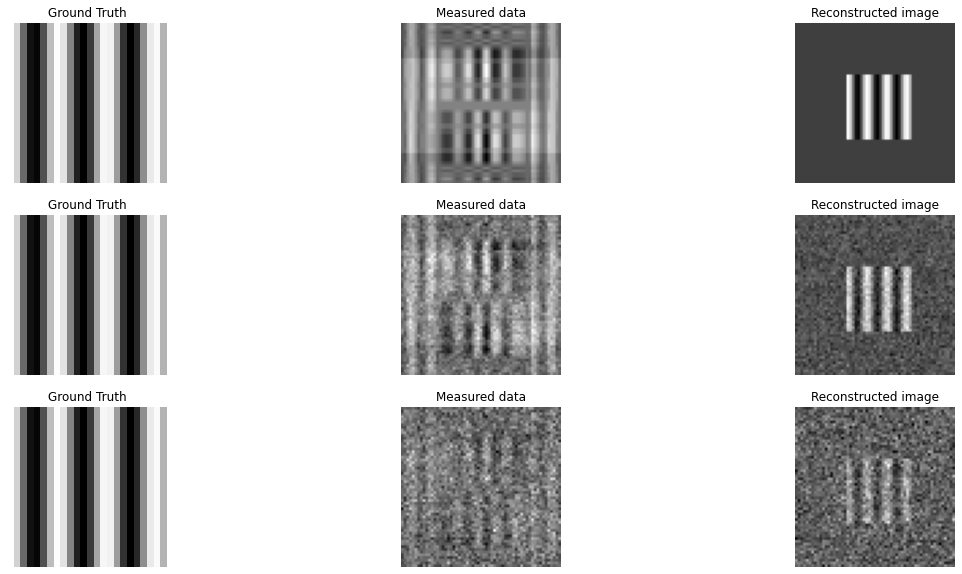

In [41]:
X = np.linspace(0,1,24)
Y = X
X, Y = np.meshgrid(X,Y)

Fringe = np.cos(X*20)+.5
imagey = Fringe
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

plt.subplot(3,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=1000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')
# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(3,3,7);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(3,3,8);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(3,3,9);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

As expected, noise pretty much destroys the accuracy for linear reconstruction. Need to have lots of photons to get good reconstrcution, which is hard if you have a coded aperture without a lens...

###Part 2

In [56]:
# load the mnist dataset of characters
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
x_train = x_train[0:5000]
y_train = y_train[0:5000]
x_test = x_test[0:5000]
y_test = y_test[0:5000]


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_test[pop,:,:], mode='same',boundary='wrap'))\
                                               ,mode='same',boundary='wrap'),dsize=(28,28))
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_train[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(28,28))
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
g_train = np.reshape(g_train, (len(g_train), 28, 28, 1))
g_test = np.reshape(g_test, (len(g_test), 28, 28, 1))

In [57]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 32)        0   

In [58]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
40/40 [==============================] - 16s 375ms/step - loss: 0.4837 - val_loss: 0.2916
Epoch 2/10
40/40 [==============================] - 15s 377ms/step - loss: 0.2589 - val_loss: 0.2329
Epoch 3/10
40/40 [==============================] - 16s 392ms/step - loss: 0.2315 - val_loss: 0.2176
Epoch 4/10
40/40 [==============================] - 16s 389ms/step - loss: 0.2159 - val_loss: 0.2078
Epoch 5/10
40/40 [==============================] - 16s 390ms/step - loss: 0.2011 - val_loss: 0.1883
Epoch 6/10
40/40 [==============================] - 16s 390ms/step - loss: 0.1848 - val_loss: 0.1739
Epoch 7/10
40/40 [==============================] - 16s 414ms/step - loss: 0.1741 - val_loss: 0.1693
Epoch 8/10
40/40 [==============================] - 16s 408ms/step - loss: 0.1658 - val_loss: 0.1610
Epoch 9/10
40/40 [==============================] - 16s 401ms/step - loss: 0.1600 - val_loss: 0.1614
Epoch 10/10
40/40 [==============================] - 16s 395ms/step - loss: 0.1562 - val_lo

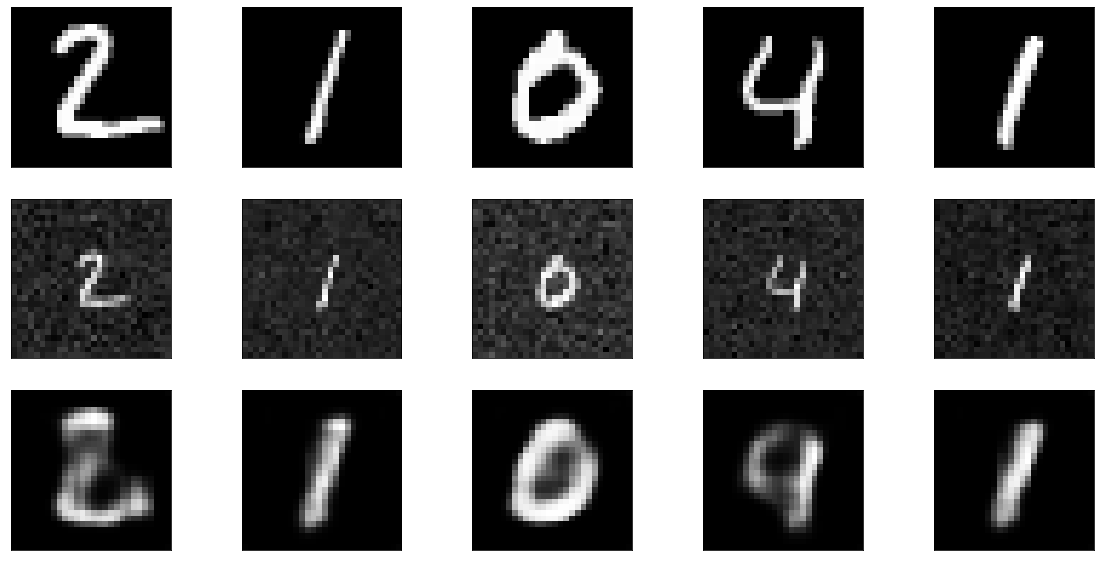

In [59]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)